# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [2]:
import warnings
warnings.simplefilter('ignore')

### **Задание 0**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов. При указании `seed`, методы, включающие в себя случайность, будут выдавать одинаковые результаты при каждом запуске кода.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print('Train data shape:', df_train.shape)
print('Test data shape: ', df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


Пропуски есть в столбцах `mileage`, `engine`, `max_power`, `torque` и `seats`.

In [6]:
print(df_train.duplicated().sum())

985


In [7]:
print(df_test.duplicated().sum())

62


В данных есть дубликаты.

In [8]:
from ydata_profiling import ProfileReport

train_profile = ProfileReport(df_train, title='Train Profiling Report', pool_size=8)
test_profile = ProfileReport(df_test, title='Test Profiling Report', pool_size=8)

In [9]:
# train_profile.to_notebook_iframe()

In [10]:
# test_profile.to_notebook_iframe()

In [11]:
train_profile.to_file('profiling_reports/train_profile.html')
test_profile.to_file('profiling_reports/test_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы:
- В данных ощутимое количество пропусков и дубликатов.
- Между некоторыми столбцами присутствует довольно высокая корреляция (возможно появление проблемы мультиколлинеарности).
- Категориальные значения в столбце `seller_type` не сбалансированы.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [12]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [13]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [14]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [15]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


В некоторых столбцах (`selling_price` и `km_driven`) среднее и медиана отличаются между собой достаточно сильно, что может свидетельствовать о существенном числе выбросов в данных столбцах.

Статистики для тренировочной и тестовой выборок близки, что говорит о корректном разбиении данных.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [16]:
df_train_features = df_train.drop('selling_price', axis=1)
all_dupl = df_train_features.duplicated(keep=False)
dupl_except_first = df_train_features.duplicated()
print(f'Все дубликаты: {all_dupl.sum()}, дубликаты без первых вхождений: {dupl_except_first.sum()}')

Все дубликаты: 1799, дубликаты без первых вхождений: 1159


Дубликаты есть, полное их количество - 1799, количество без первых вхождений - 1159.

In [17]:
df_train[all_dupl == True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [18]:
df_train = df_train[dupl_except_first == False]

In [19]:
df_train.shape

(5840, 13)

In [20]:
assert df_train.shape == (5840, 13)

In [21]:
df_train = df_train.reset_index(drop=True)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения.


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [22]:
df_train['mileage'] = df_train['mileage'].str.split().str[0].astype(float)
df_train['engine'] = df_train['engine'].str.split().str[0].astype(float)
df_train['max_power'] = df_train['max_power'].str.replace('bhp', 'NaN')
df_train['max_power'] = df_train['max_power'].str.split().str[0].astype(float)

In [23]:
df_test['mileage'] = df_test['mileage'].str.split().str[0].astype(float)
df_test['engine'] = df_test['engine'].str.split().str[0].astype(float)
df_test['max_power'] = df_test['max_power'].str.replace('bhp', 'NaN')
df_test['max_power'] = df_test['max_power'].str.split().str[0].astype(float)

Данные в `torque` были очень разношёрстные...

In [24]:
import re

def process_torque(torque_str: str) -> (float, float):
    """Функция для обработки столбца `torque`."""

    # если встречен пропуск
    if type(torque_str) is float:
        return np.nan, np.nan

    # удаление запятой, разделяющей разряды некоторых чисел
    torque_str = torque_str.replace(',', '')

    # поиск чисел в строке
    numbers = re.findall(r'\d+\.?\d*', torque_str)

    # первое число - крутящий момент
    torque = float(numbers[0])
    # конвертация единиц измерения при необходимости
    if 'kgm' in torque_str.lower() and 'nm' not in torque_str.lower():
        # если указано только значение в `kgm`, то конвертируем его
        torque *= 9.81

    # если нет данных об оборотах
    if len(numbers) == 1:
        return torque, np.nan

    # иногда второе значение - крутящий момент в `kgm`, удаляем его
    if '.' in numbers[1]:
        numbers.pop(1)

    # второе число (или 2-е и 3-е) - обороты двигателя, при которых достигается крутящий момент
    rpm = sum(map(float, numbers[1:])) / len(numbers[1:])

    return torque, rpm

In [25]:
df_train['torque'] = df_train['torque'].apply(process_torque)
df_train['max_torque_rpm'] = df_train['torque'].str[1].astype(float)
df_train['torque'] = df_train['torque'].str[0].astype(float)

In [26]:
df_test['torque'] = df_test['torque'].apply(process_torque)
df_test['max_torque_rpm'] = df_test['torque'].str[1].astype(float)
df_test['torque'] = df_test['torque'].str[0].astype(float)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [27]:
df_test['mileage'] = df_test['mileage'].fillna(df_train['mileage'].median())
df_test['engine'] = df_test['engine'].fillna(df_train['engine'].median())
df_test['max_power'] = df_test['max_power'].fillna(df_train['max_power'].median())
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median())
df_test['torque'] = df_test['torque'].fillna(df_train['torque'].median())
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

In [28]:
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())
df_train['torque'] = df_train['torque'].fillna(df_train['torque'].median())
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


Мы могли применить и среднее значение для заполнения пропусков. Медиана чуть лучше тем, что она меньше реагирует на выбросы, но, в целом, и использование среднего значения должно дать очень близкий по качеству результат.

Медианы для заполнения стоит считать по тренировочным данным для `train` и `test`, чтобы никак не заглядывать в тестовые данные.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [30]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [31]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

`seats` можно рассмотреть как категориальную переменную, потому что она принимает конечное (и достаточно небольшое) число различных значений.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответьте на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков сдвинуло наши распределения? Могло ли это вообще возникнуть?

In [32]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,175.362665,5.426712,2846.363955
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,107.161739,0.982344,973.142576
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.088000,2.000000,1300.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,2400.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.124000,5.000000,3750.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.900000,14.000000,21800.000000


In [33]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,177.621834,5.403000,2890.841000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,103.745986,0.912921,954.928129
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,48.000000,4.000000,1470.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,111.700000,5.000000,2125.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,160.000000,5.000000,2400.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,205.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,1422.450000,9.000000,5000.000000


При замене пропусков средним значением или медианой распределения данных могли несколько измениться, но при не слишком большом числе пропусков обычно это некритично.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

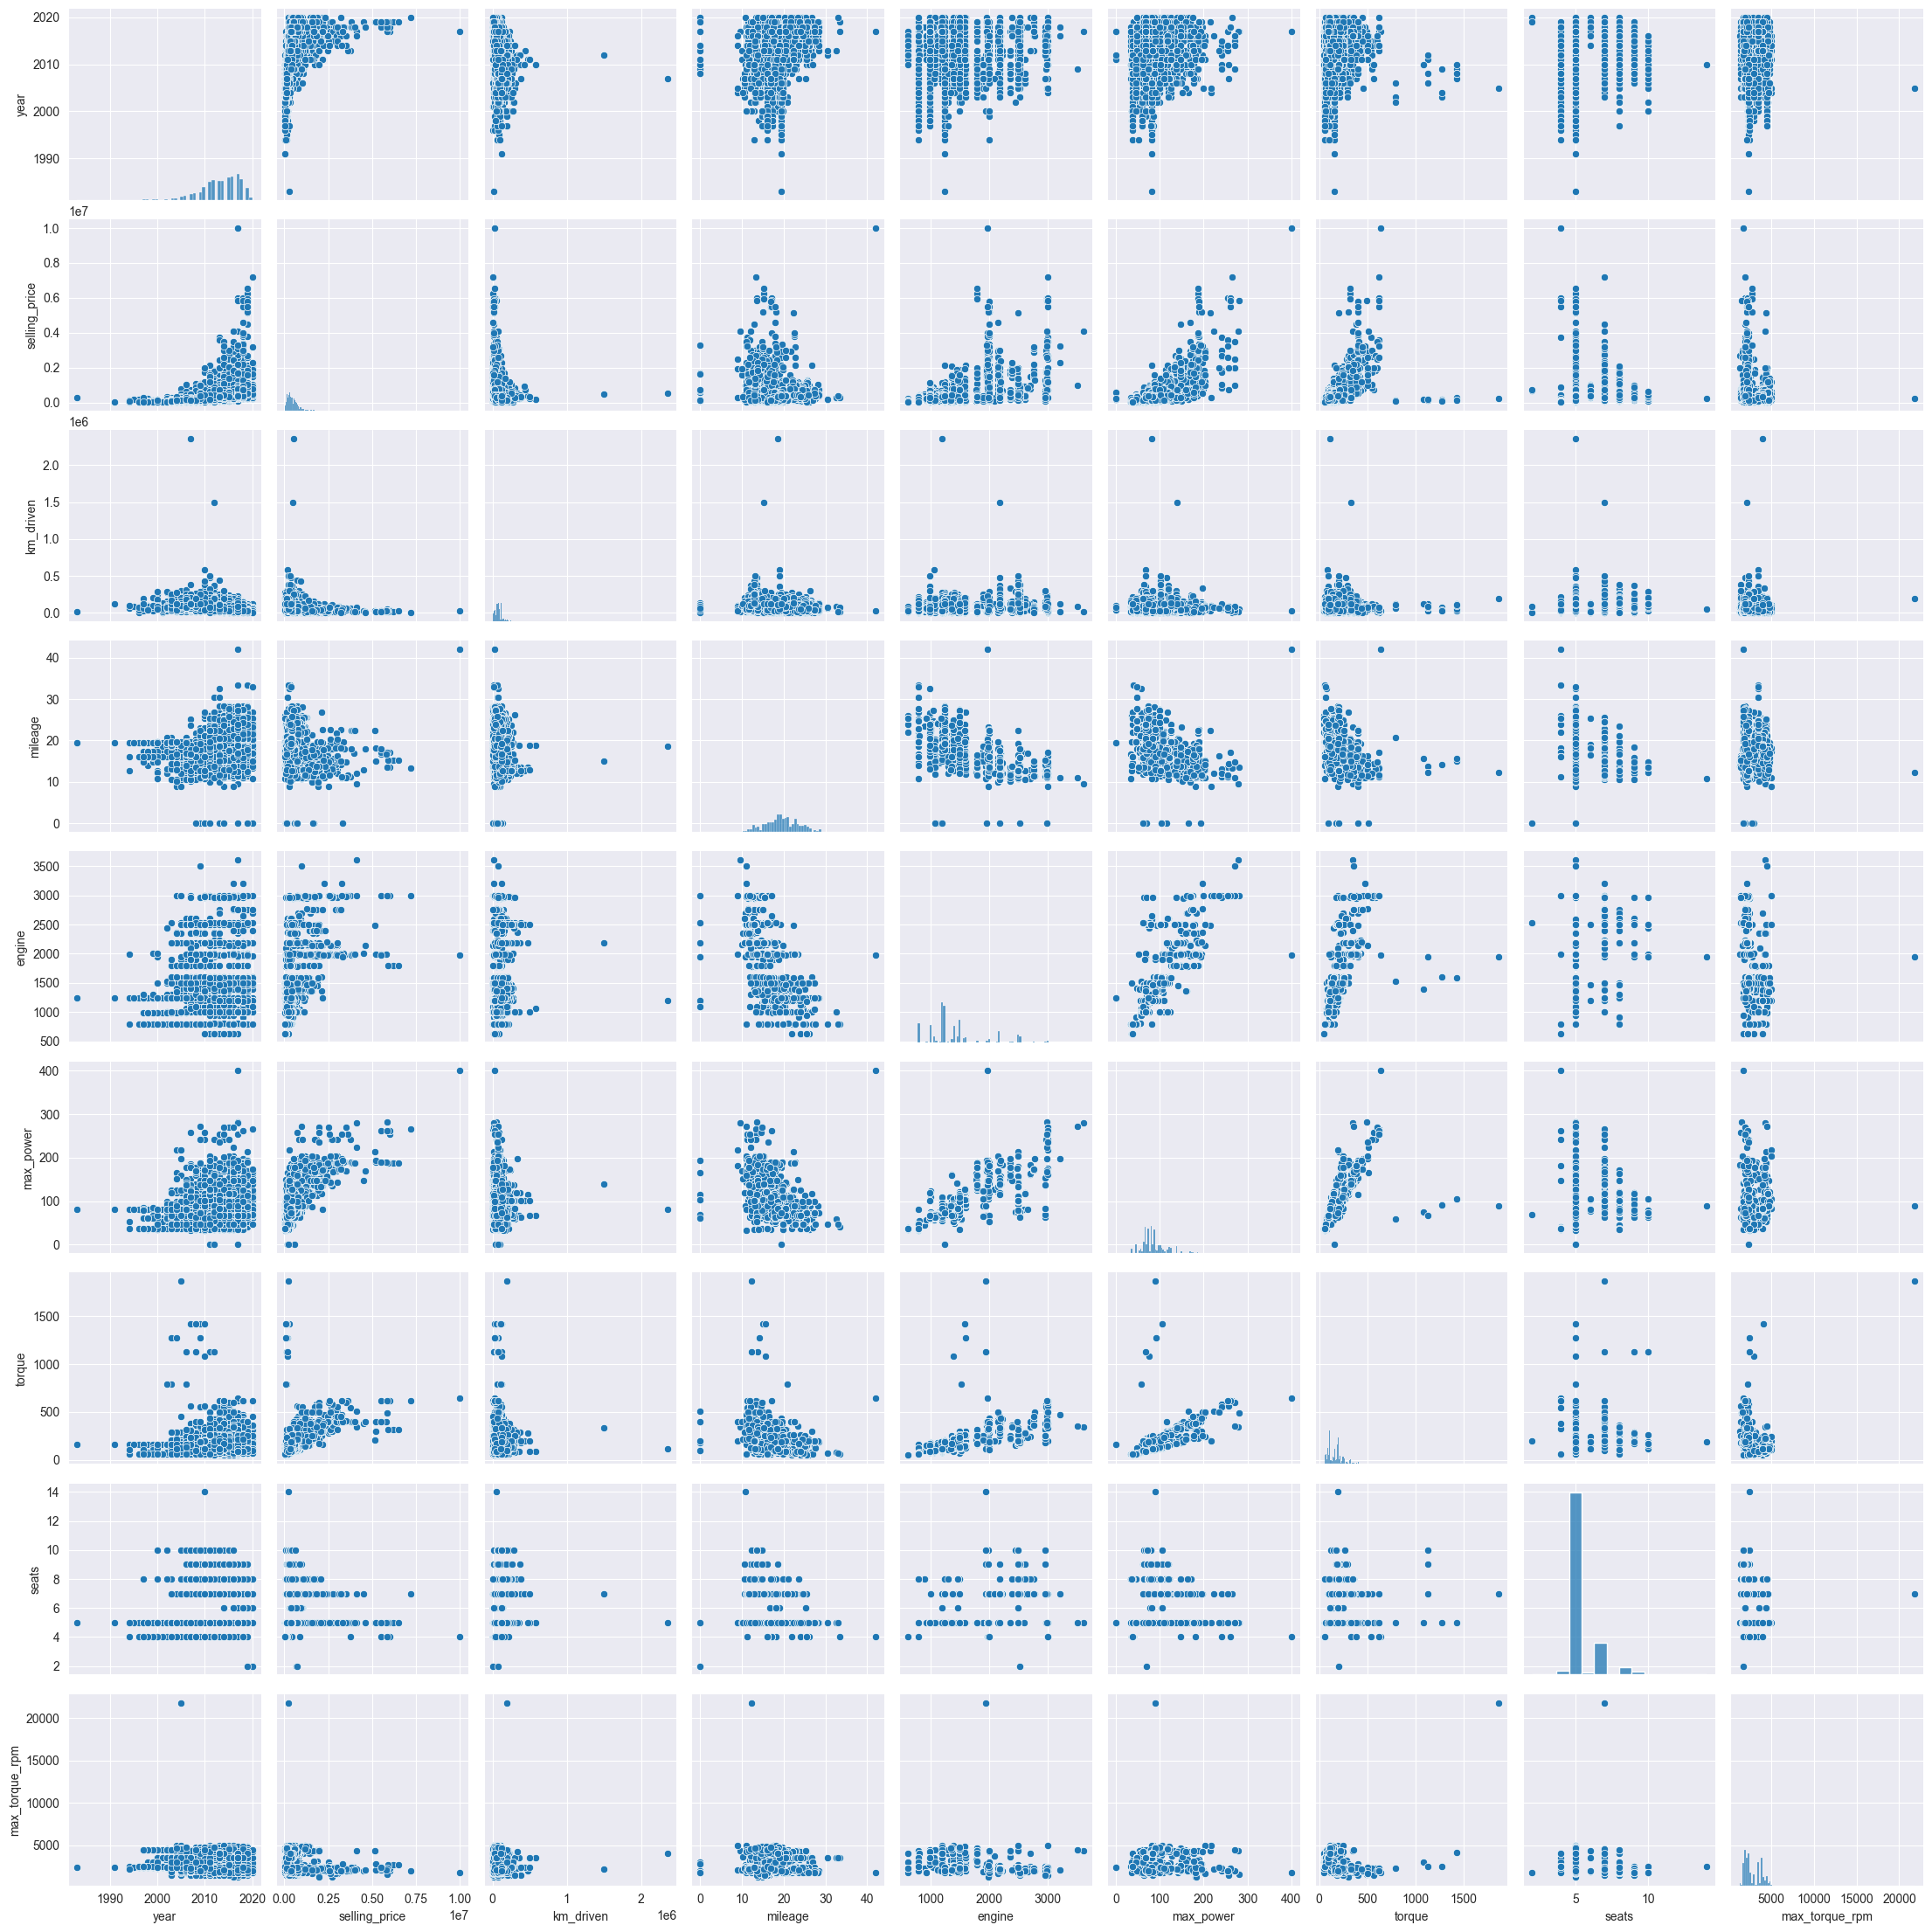

In [34]:
%matplotlib inline
sns.pairplot(df_train)

По данным графикам можно сделать выводы и о связи признаков с целевой переменной, и о корреляциях признаков. Например, признаки `engine`, `max_power` и `torque` явно достаточно сильно коррелируют между собой, а целевая переменная прямо линейно (?) зависит от этих признаков.

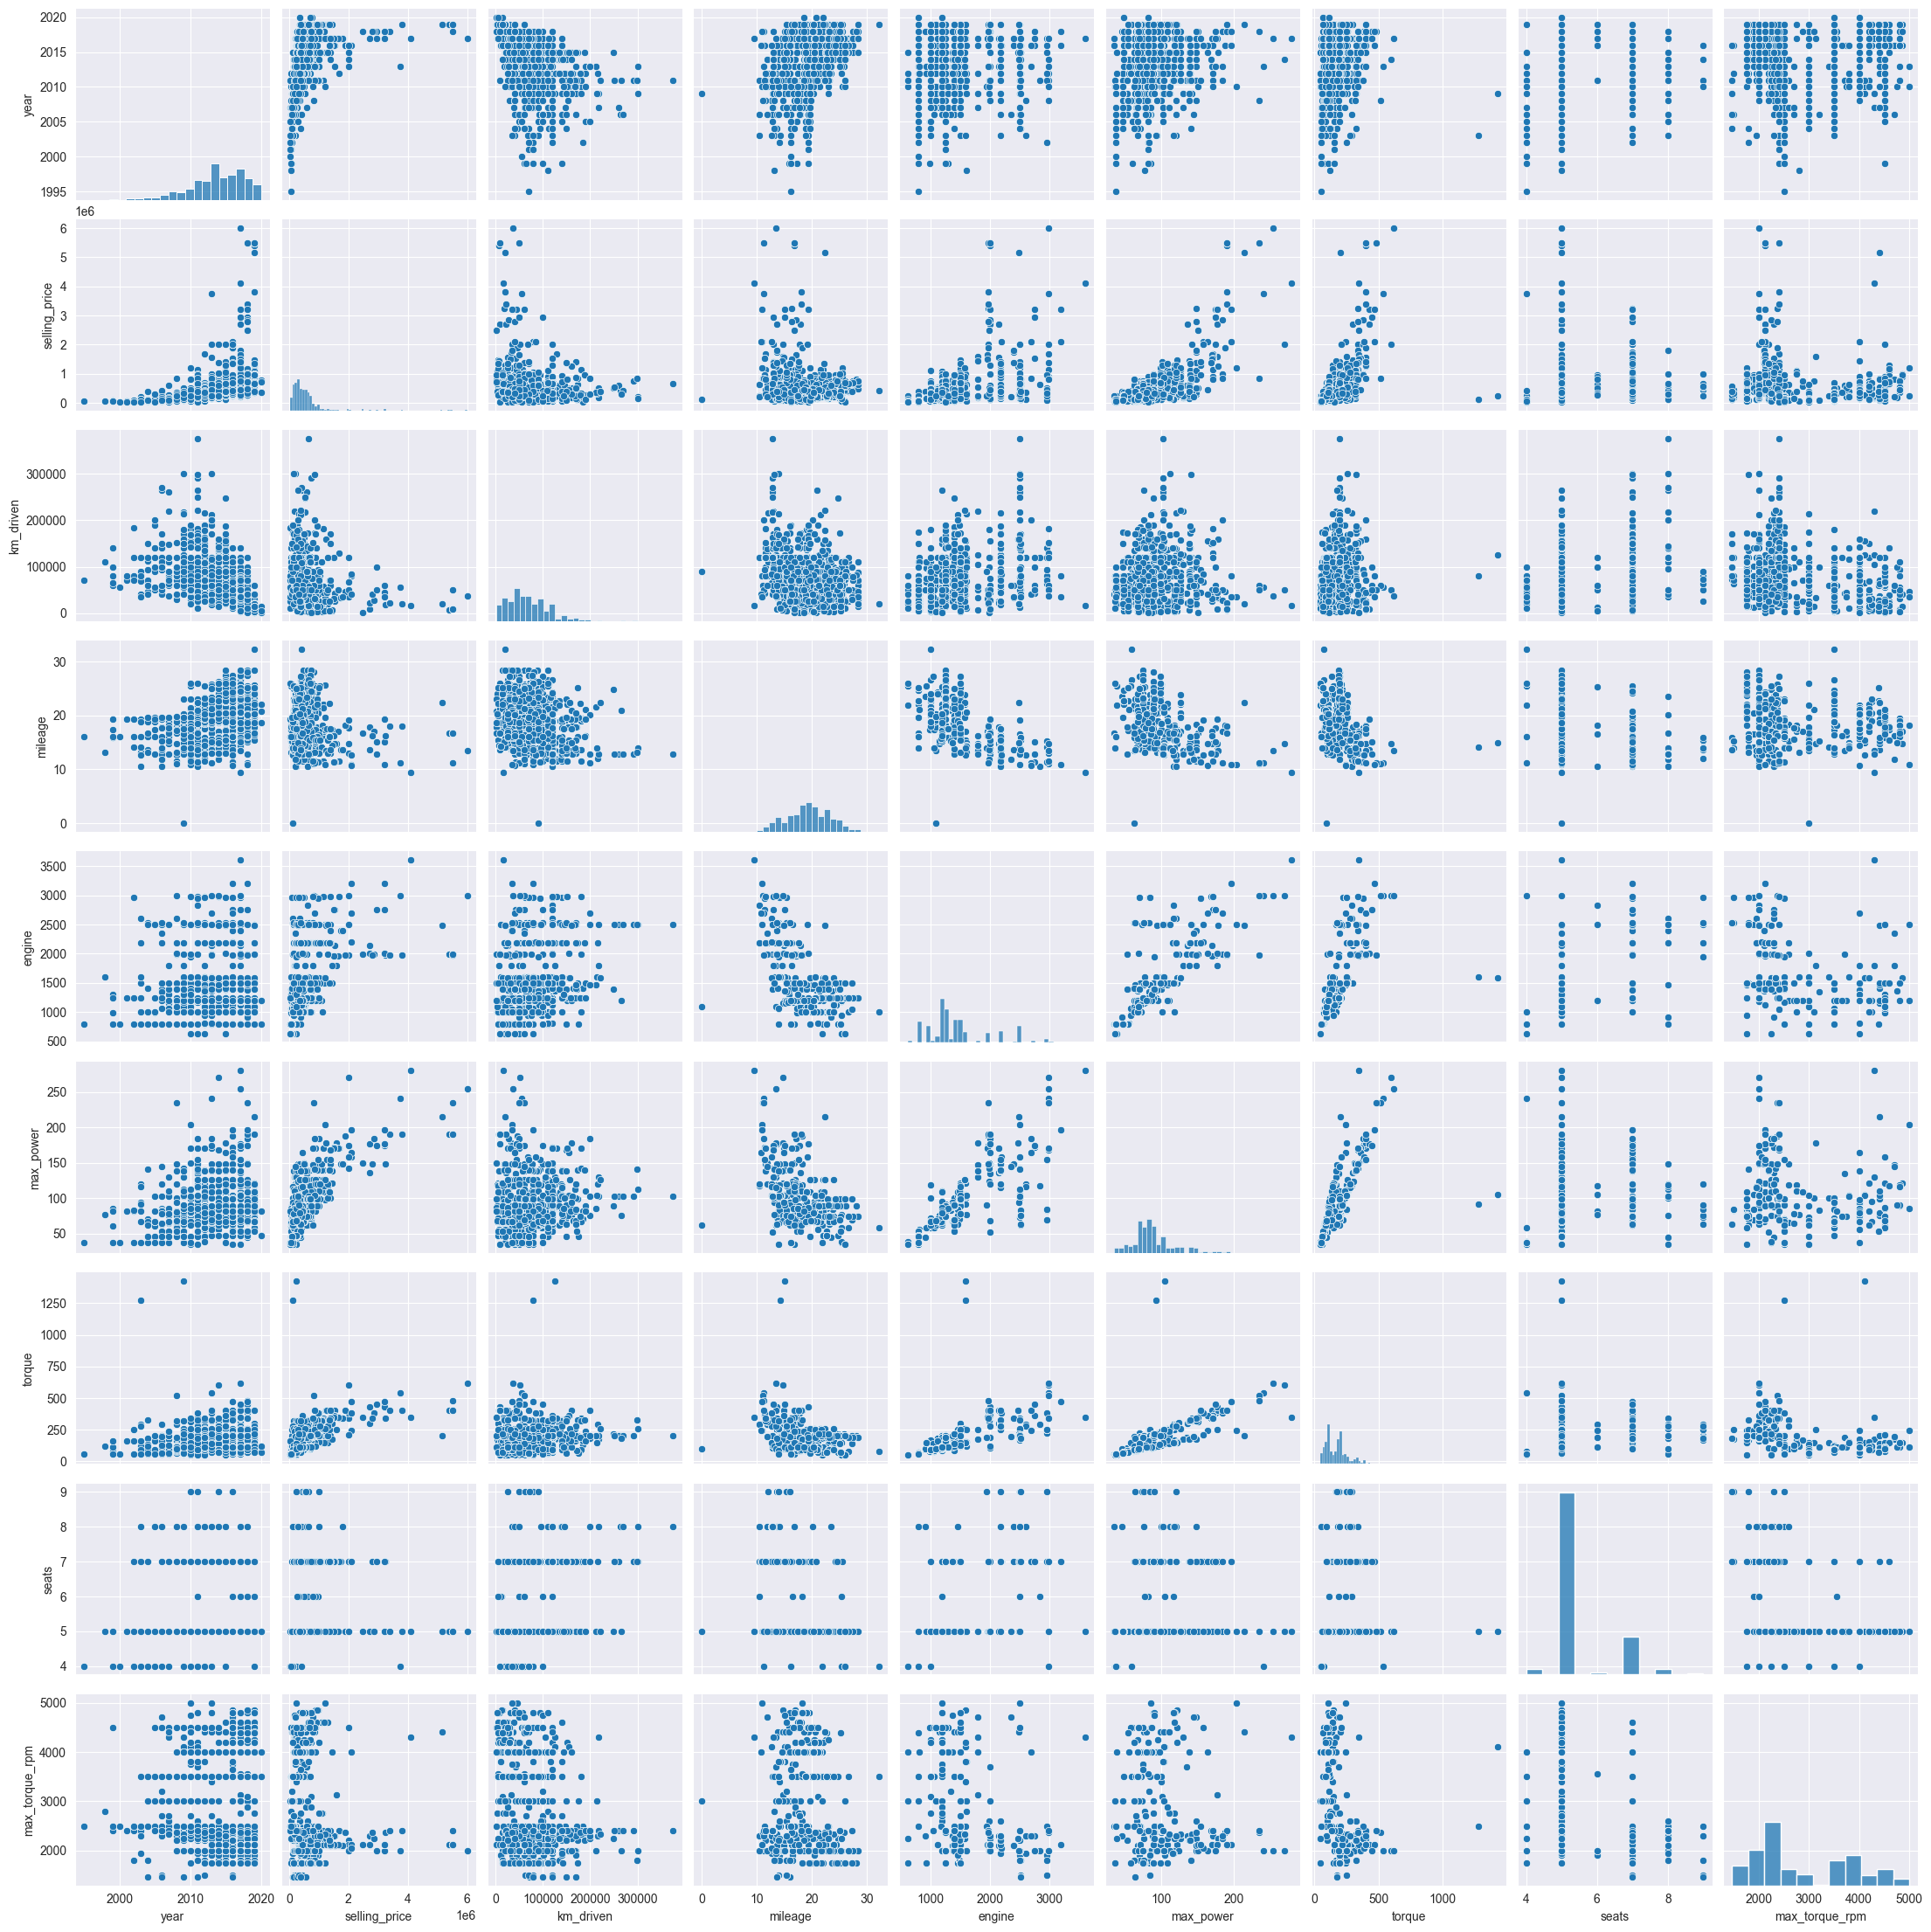

In [35]:
sns.pairplot(df_test)

Тренировочная и тестовая выборки визуально достаточно похожи.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

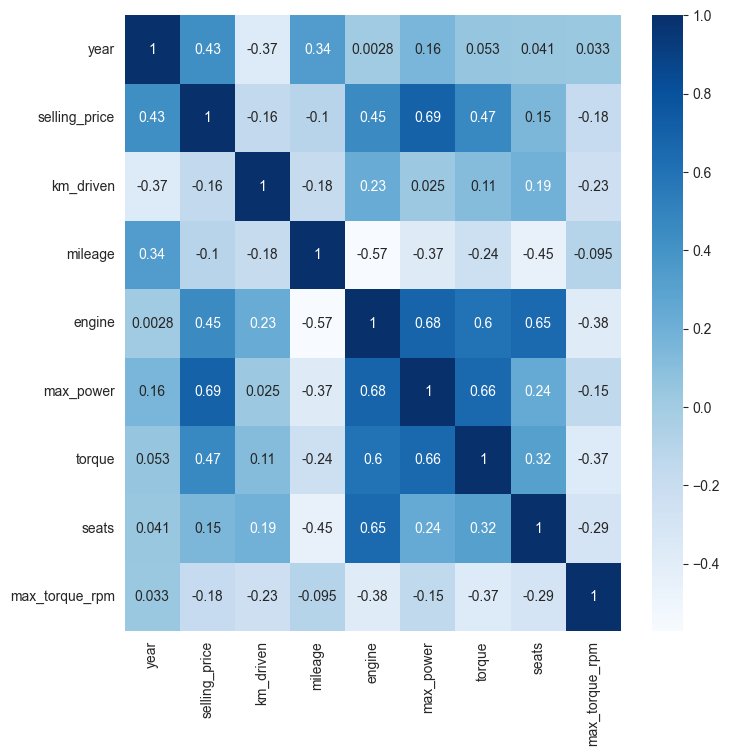

In [36]:
plt.figure(figsize=(8,8))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, cmap='Blues', annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее коррелируют между собой признаки `year` и `engine`.

Довольно сильная положительная линейная зависимость наблюдается между признаками `engine`, `max_power` и `torque`.

Между признаками `year` и `km_driven` есть отрицательная линейная зависимость, поэтому так утверждать можно.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [37]:
def spearman_corr(x_: np.ndarray, y_: np.ndarray) -> float:
    """Корреляция Спирмена."""

    assert len(x_) == len(y_)
    n = len(x_)

    # сортировка массива
    sorted_x = np.sort(x_)
    # вычисление рангов элементов
    ranks_x = {}
    for xi in x_:
        i, = np.where(np.isclose(sorted_x, xi))
        rank = np.sum(i) / len(i) + 1
        ranks_x[xi] = rank

    # сортировка массива
    sorted_y = np.sort(y_)
    # вычисление рангов элементов
    ranks_y = {}
    for yi in y_:
        i, = np.where(np.isclose(sorted_y, yi))
        rank = np.sum(i) / len(i) + 1
        ranks_y[yi] = rank

    # вычисление суммы квадратов разностей рангов
    d2 = np.sum([(ranks_x[x_[i]] - ranks_y[y_[i]]) ** 2
                 for i in range(n)])

    # вычисление корреляции по формуле
    return 1 - 6 * d2 / (n * (n ** 2 - 1))

In [38]:
x = np.array([122, 105, 100, 145, 130, 90, 162, 172, 120, 150, 170, 112])
y = np.array([4.7, 4.5, 4.4, 3.8, 3.7, 4.6, 4.0, 4.2, 4.1, 3.6, 3.5, 4.8])

In [39]:
print(spearman_corr(x, y))

-0.6573426573426573


In [40]:
print(pd.DataFrame(zip(x, y)).corr('spearman')[0][1])

-0.6573426573426573


Вычисления сходятся.

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


<Axes: >

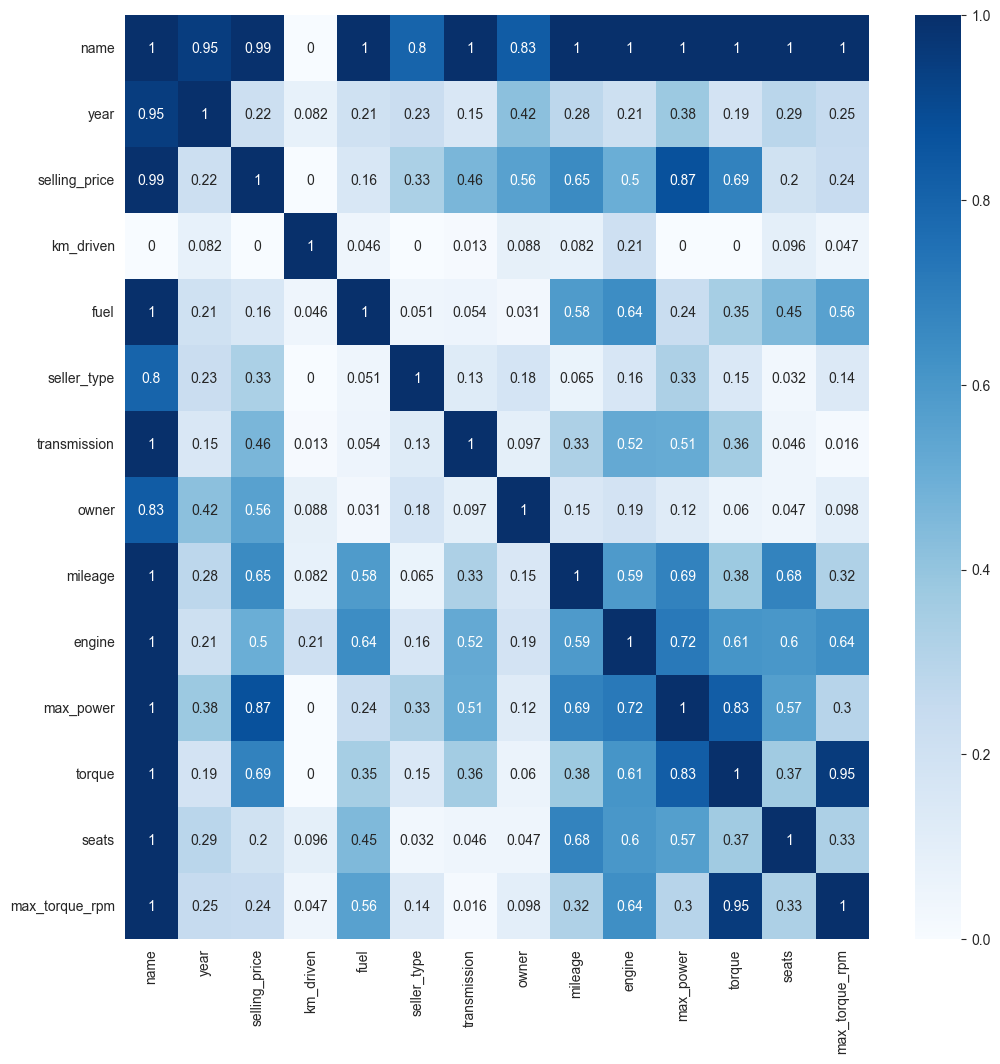

In [41]:
import phik

plt.figure(figsize=(12,12))
ph = df_train.phik_matrix()
sns.heatmap(ph, cmap='Blues', annot=True)

Из того, что не было видно по стандартной матрице Пирсона:
- Категориальный признак `name` очень сильно скоррелирован почти со всеми другими признаками и с целевой переменной, что логично, ведь по полному названию модели можно получить очень много информации о характеристиках автомобиля.
- Целевая переменная относительно сильно положительно коррелирует с категориальными признаками `name`, `seller_type`, `transmission`, `owner`.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Box plots для признаков.

In [42]:
df_train_num_features = df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'], axis=1)
df_test_num_features = df_test.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'], axis=1)

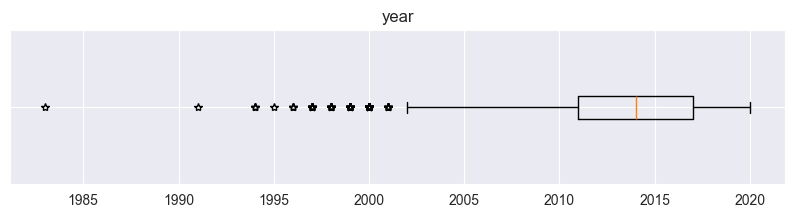

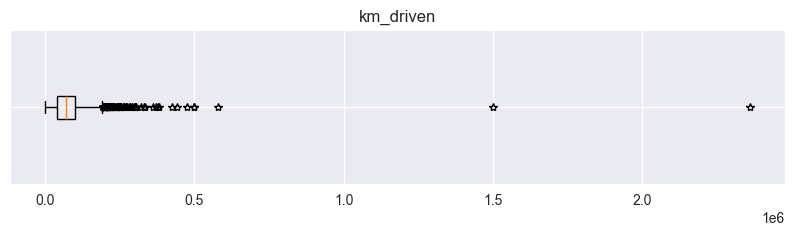

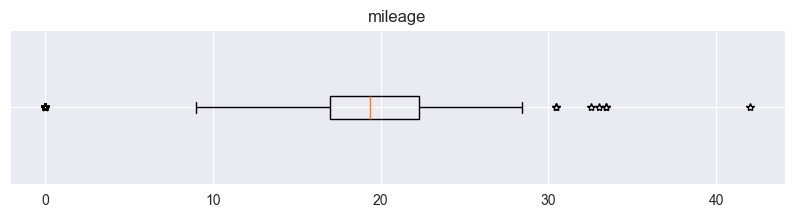

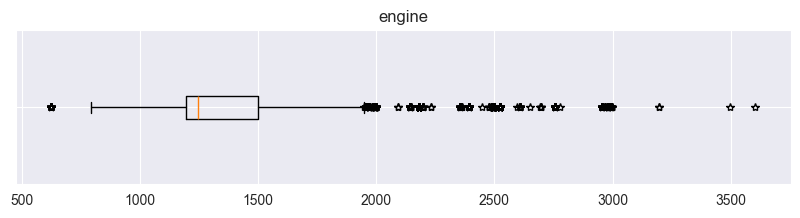

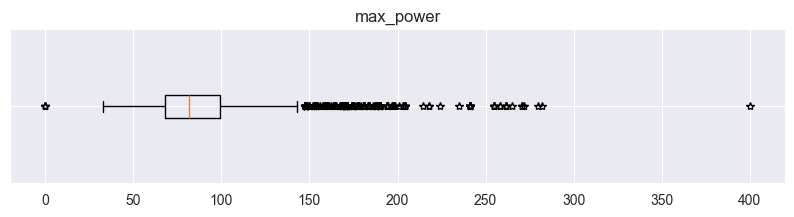

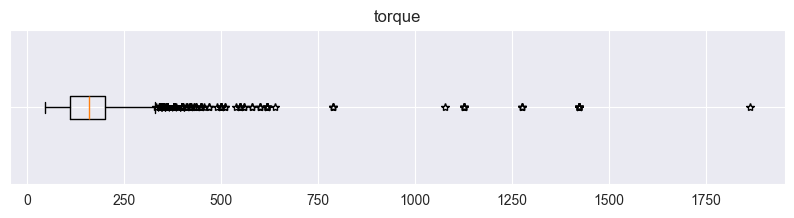

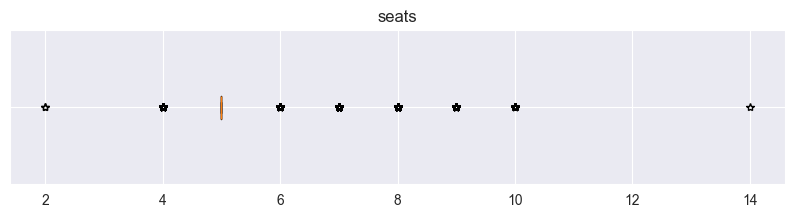

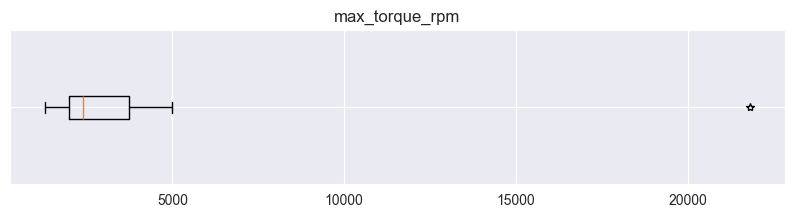

In [43]:
for feature in df_train_num_features:
    plt.figure(figsize=(10,2))
    plt.boxplot(df_train_num_features[feature], vert=False, tick_labels=[''], sym='*')
    plt.title(feature)

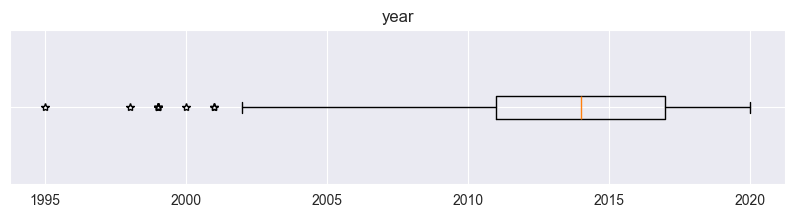

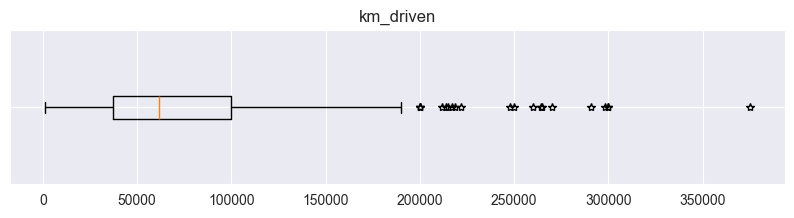

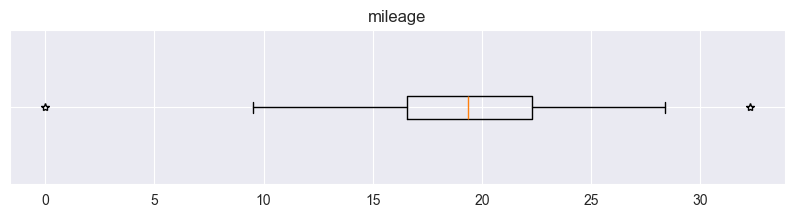

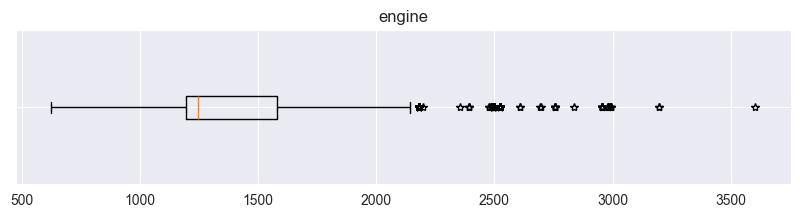

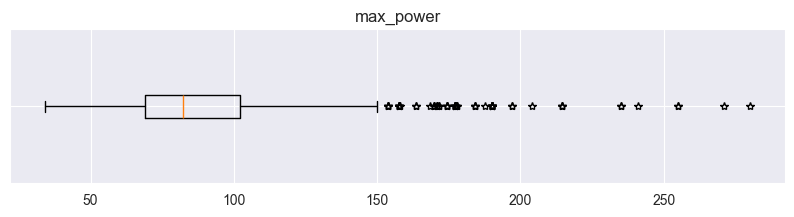

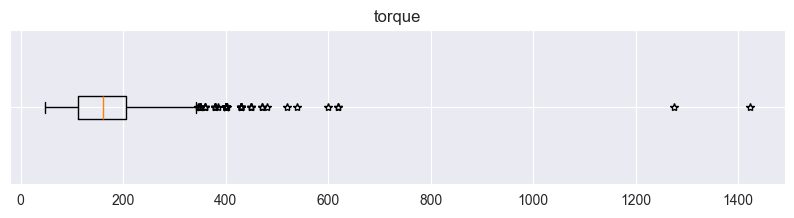

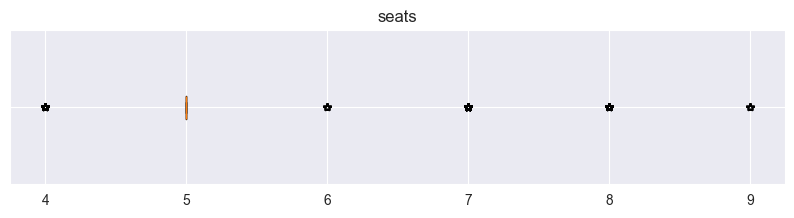

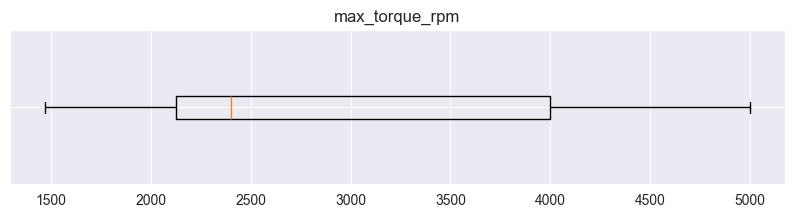

In [44]:
for feature in df_test_num_features:
    plt.figure(figsize=(10,2))
    plt.boxplot(df_test_num_features[feature], vert=False, tick_labels=[''], sym='*')
    plt.title(feature)

Признак `km_driven` возможно стоит логарифмировать, а в тренировочных данных в столбце `max_torque_rpm` есть странный выброс.

Также по графикам отчётливо видно, что `seats` - категориальный признак.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [45]:
df_train_num = df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)
df_test_num = df_test.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [46]:
y_train = df_train_num['selling_price']
X_train = df_train_num.drop('selling_price', axis=1)

In [47]:
assert X_train.shape == (5840, 8)

In [48]:
y_test = df_test_num['selling_price']
X_test = df_test_num.drop('selling_price', axis=1)

In [49]:
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as mse, root_mean_squared_error as rmse

lr_model_1 = LinearRegression()
lr_model_1.fit(X_train, y_train)

train_pred_lr_1 = lr_model_1.predict(X_train)
test_pred_lr_1 = lr_model_1.predict(X_test)
print(f'Train R2: {r2_score(y_train, train_pred_lr_1):.5f}, Test R2: {r2_score(y_test, test_pred_lr_1):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_lr_1):.2f}, Test MSE: {mse(y_test, test_pred_lr_1):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_lr_1):.2f}, Test RMSE: {rmse(y_test, test_pred_lr_1):.2f}')

Train R2: 0.60164, Test R2: 0.59955
Train MSE: 114185991426.81, Test MSE: 230191531986.26
Train RMSE: 337914.18, Test RMSE: 479782.80


Помимо MSE я также считаю значение RMSE, потому что её проще интерпретировать.

Полученная модель имеет не очень хорошие значения метрик, но, по крайней мере, она работает намного лучше, чем предсказание средним значением. :)

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [51]:
def r2_score_custom(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """R2 score."""
    assert len(y_true) == len(y_pred)
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

In [52]:
assert np.isclose(r2_score_custom(y_test, test_pred_lr_1), r2_score(y_test, test_pred_lr_1))

Формула: ![R2 score](https://i2.wp.com/miro.medium.com/0*EmJ1gkI6B0fGE4eE)

В числителе дроби стоит сумма квадратов ошибок модели, в знаменателе дроби стоит сумма квадратов ошибок наивной модели, всегда предсказывающей среднее значение, и вся эта дробь отнимается от единицы. Таким образом, R2 равна 1 для идеальной модели, ошибки которой равны нулю; R2 равна 0 для наивной модели, предсказывающей среднее значение; R2 стремится к минус бесконечности при стремлении суммы квадратов ошибок к бесконечности.


### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [53]:
def adjusted_r2_score_custom(y_true: np.ndarray, y_pred: np.ndarray, p: int) -> float:
    """Adjusted R2 score."""
    assert len(y_true) == len(y_pred)
    n = len(y_true)
    return 1 - (1 - r2_score_custom(y_true, y_pred)) * (n - 1) / (n - p - 1)

In [54]:
print(f'R2: {r2_score_custom(y_test, test_pred_lr_1)}, Adjusted R2: {adjusted_r2_score_custom(y_test, test_pred_lr_1, X_test.shape[1])}')

R2: 0.5995475003314796, Adjusted R2: 0.5963147859042868


Adjusted R2 применяется в качестве попытки скомпенсировать рост классического R2 при увеличении числа переменных в модели (==степеней свободы). По adjusted R2 лучше видна взаимосвязь между эффективностью модели и её сложностью, что позволяет найти компромисс.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler_1 = StandardScaler()
scaler_1.fit(X_train)

X_train = pd.DataFrame(scaler_1.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_1.transform(X_test), columns=X_test.columns)

In [56]:
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train, y_train)

train_pred_lr_2 = lr_model_2.predict(X_train)
test_pred_lr_2 = lr_model_2.predict(X_test)
print(f'Train R2: {r2_score(y_train, train_pred_lr_2):.5f}, Test R2: {r2_score(y_test, test_pred_lr_2):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_lr_2):.2f}, Test MSE: {mse(y_test, test_pred_lr_2):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_lr_2):.2f}, Test RMSE: {rmse(y_test, test_pred_lr_2):.2f}')

Train R2: 0.60164, Test R2: 0.59955
Train MSE: 114185991426.81, Test MSE: 230191531986.26
Train RMSE: 337914.18, Test RMSE: 479782.80


Метрики качества практически (или вообще) не изменились.

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [57]:
pd.DataFrame(zip(X_train.columns, lr_model_2.coef_), columns=['Признак', 'Коэффициент'])

,Признак,Коэффициент
0,year,165845.211685
1,km_driven,-49845.393739
2,mileage,-10060.298859
3,engine,16204.464305
4,max_power,325076.828861
5,torque,6829.406876
6,seats,-32199.733594
7,max_torque_rpm,-63508.455989


Наибольший по модулю коэффициент при признаке `max_power`, то есть он самый информативный.

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [58]:
from sklearn.linear_model import Lasso

lasso_model_1 = Lasso(random_state=42)
lasso_model_1.fit(X_train, y_train)

train_pred_lasso_1 = lasso_model_1.predict(X_train)
test_pred_lasso_1 = lasso_model_1.predict(X_test)
print(f'Train R2: {r2_score(y_train, train_pred_lasso_1):.5f}, Test R2: {r2_score(y_test, test_pred_lasso_1):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_lasso_1):.2f}, Test MSE: {mse(y_test, test_pred_lasso_1):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_lasso_1):.2f}, Test RMSE: {rmse(y_test, test_pred_lasso_1):.2f}')

Train R2: 0.60164, Test R2: 0.59955
Train MSE: 114185991439.76, Test MSE: 230192255266.06
Train RMSE: 337914.18, Test RMSE: 479783.55


Метрики получились почти такие же, как и у предыдущих моделей.

In [59]:
lasso_model_1.coef_

array([165843.10024443, -49844.42664547, -10057.14924159,  16202.54670897,
       325078.37767849,   6828.75630504, -32195.75309075, -63506.42920847])

Никакие веса не занулились, вероятнее всего потому, что до этого никакие веса не были близки к нулю, то есть все признаки значимы для модели, а также потому, что коэффициент регуляризации слишком низкий для зануления весов.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000],
    'max_iter': [100, 1000, 10000]
}

lasso_model_2 = Lasso(random_state=42)
lasso_gs = GridSearchCV(lasso_model_2, param_grid, cv=10, scoring='r2')
lasso_gs.fit(X_train, y_train)

print(f'Best score: {lasso_gs.best_score_:.5f}, best params: {lasso_gs.best_params_}')

Best score: 0.58401, best params: {'alpha': 25000, 'max_iter': 100}


In [61]:
lasso_model_3 = Lasso(alpha=25000, max_iter=100, random_state=42)
lasso_model_3.fit(X_train, y_train)

train_pred_lasso_3 = lasso_model_3.predict(X_train)
test_pred_lasso_3 = lasso_model_3.predict(X_test)
print(f'Train R2: {r2_score(y_train, train_pred_lasso_3):.5f}, Test R2: {r2_score(y_test, test_pred_lasso_3):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_lasso_3):.2f}, Test MSE: {mse(y_test, test_pred_lasso_3):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_lasso_3):.2f}, Test RMSE: {rmse(y_test, test_pred_lasso_3):.2f}')

Train R2: 0.59219, Test R2: 0.56944
Train MSE: 116894320977.02, Test MSE: 247498376577.39
Train RMSE: 341898.11, Test RMSE: 497492.09


Было обучено 8 * 3 = 24 модели на 10 фолдах.

Подбираемые гиперпараметры:
- `alpha` - коэффициент регуляризации.
- `max_iter` - максимальное число итераций.

Лучший найденный коэффициент регуляризации равен 20000...

In [62]:
lasso_gs.best_estimator_.coef_

array([145718.2169147 , -24525.97818931,      0.        ,      0.        ,
       318945.04702008,      0.        ,     -0.        , -31192.27721705])

Некоторые коэффициенты модели занулились.

from **Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [63]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000],
    'l1_ratio': [0.0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0],
    'max_iter': [10000, 100000]
}

elasticnet_model_1 = ElasticNet(random_state=42)
elasticnet_gs = GridSearchCV(elasticnet_model_1, param_grid, cv=10, scoring='r2')
elasticnet_gs.fit(X_train, y_train)

print(f'Best score: {elasticnet_gs.best_score_:.5f}, best params: {elasticnet_gs.best_params_}')

Best score: 0.58401, best params: {'alpha': 25000, 'l1_ratio': 1.0, 'max_iter': 10000}


Было обучено 8 * 9 * 2 = 144 модели на 10 фолдах.

In [64]:
elasticnet_model_2 = ElasticNet(alpha=25000, l1_ratio=1.0, max_iter=10000, random_state=42)
elasticnet_model_2.fit(X_train, y_train)

train_pred_en_2 = elasticnet_model_2.predict(X_train)
test_pred_en_2 = elasticnet_model_2.predict(X_test)
print(f'Train R2: {r2_score(y_train, train_pred_en_2):.5f}, Test R2: {r2_score(y_test, test_pred_en_2):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_en_2):.2f}, Test MSE: {mse(y_test, test_pred_en_2):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_en_2):.2f}, Test RMSE: {rmse(y_test, test_pred_en_2):.2f}')

Train R2: 0.59219, Test R2: 0.56944
Train MSE: 116894320977.02, Test MSE: 247498376577.39
Train RMSE: 341898.11, Test RMSE: 497492.09


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**
- [ ] Реализуйте модель с $L0$-регуляризацией.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [65]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score

from itertools import combinations

class L0Regression(BaseEstimator, RegressorMixin):
    """Модель линейной регрессии с L0-регуляризацией."""

    def __init__(self, max_features=None, cv=5, scoring='r2'):
        self.max_features = max_features
        self.cv = cv
        self.scoring = scoring
        self.selected_features_ = None
        self.model_ = None

    def fit(self, X: pd.DataFrame, y: pd.Series):
        """
        Перебор всех комбинаций признаков и применение линейной регрессии на них.
        Сохраняет лучшую модель в `model_` и отобранные признаки в `selected_features_`.
        """

        assert X.shape[0] == y.shape[0]

        if self.max_features is None:
            self.max_features = X.shape[0]

        # переменные для сохранения лучшего результата
        best_score, best_features = float('-inf'), []

        # перебор всех количеств признаков для сохранения
        for num_features in range(1, self.max_features + 1):
            # перебор всех комбинаций признаков для сохранения
            for feature_subset in combinations(X, num_features):
                # применение модели линейной регрессии
                model = LinearRegression()
                scores = cross_val_score(model, X[list(feature_subset)], y, cv=self.cv, scoring=self.scoring)
                mean_score = np.mean(scores)

                # если достигнуто значение лучше рекордного
                if mean_score > best_score:
                    best_score = mean_score
                    self.selected_features_ = list(feature_subset)

        self.model_ = LinearRegression().fit(X[self.selected_features_], y)

        return self

    def predict(self, X: pd.DataFrame):
        """Получение предсказаний лучшей из обученных моделей."""

        return self.model_.predict(X[self.selected_features_])

In [66]:
param_grid = {
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8]
}

l0_model_1 = L0Regression()
l0_gs = GridSearchCV(l0_model_1, param_grid, cv=10, scoring='r2')
l0_gs.fit(X_train, y_train)

print(f'Best score: {l0_gs.best_score_:.5f}, best params: {l0_gs.best_params_}')

Best score: 0.58164, best params: {'max_features': 3}


In [67]:
l0_model_2 = L0Regression(max_features=3)
l0_model_2.fit(X_train, y_train)

train_pred_l0_2 = l0_model_2.predict(X_train)
test_pred_l0_2 = l0_model_2.predict(X_test)
print(f'Train R2: {r2_score(y_train, train_pred_l0_2):.5f}, Test R2: {r2_score(y_test, test_pred_l0_2):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_l0_2):.2f}, Test MSE: {mse(y_test, test_pred_l0_2):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_l0_2):.2f}, Test RMSE: {rmse(y_test, test_pred_l0_2):.2f}')

Train R2: 0.59224, Test R2: 0.58146
Train MSE: 116879012665.94, Test MSE: 240588204301.23
Train RMSE: 341875.73, Test RMSE: 490497.91


L0-регуляризация помогла нам убрать из модели все признаки, кроме трёх, и при этом даже немного улучшить качество.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Классов в `name` изначально слишком много, поэтому я из названия машины оставляю только первое слово - название бренда.

In [68]:
X_train_cat = df_train.drop('selling_price', axis=1)
X_test_cat = df_test.drop('selling_price', axis=1)

In [69]:
X_train_cat['name'] = X_train_cat['name'].str.split().str[0]
X_test_cat['name'] = X_test_cat['name'].str.split().str[0]

In [70]:
assert X_train_cat.shape == (5840, 13)

In [71]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [72]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train_cat[cat_features])

X_train_cat = pd.concat([X_train_cat.drop(cat_features, axis=1),
                         pd.DataFrame(ohe.transform(X_train_cat[cat_features]))], axis=1)
X_test_cat = pd.concat([X_test_cat.drop(cat_features, axis=1),
                        pd.DataFrame(ohe.transform(X_test_cat[cat_features]))], axis=1)

X_train_cat.columns = X_train_cat.columns.astype(str)
X_test_cat.columns = X_test_cat.columns.astype(str)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

OHE стоит применять только если число категорий значений в столбцах не слишком велико. Иначе будет создано очень много признаков, что может привести к излишнему усложнению модели и, возможно, переобучению.

Один из столбцов удаляется для того, чтобы убрать линейную зависимость между полученными столбцами.

Таким образом удалять столбцы не стоит.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [73]:
from sklearn.linear_model import Ridge

param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 4.5, 5, 10],
    'max_iter': [100, 1000, 10000, 100000]
}

ridge_model_1 = Ridge(random_state=42)
ridge_gs_1 = GridSearchCV(ridge_model_1, param_grid, cv=10, scoring='r2')
ridge_gs_1.fit(X_train_cat, y_train)

print(f'Best score: {ridge_gs_1.best_score_:.5f}, best params: {ridge_gs_1.best_params_}')

Best score: 0.71260, best params: {'alpha': 2, 'max_iter': 100}


In [74]:
ridge_model_2 = Ridge(alpha=2, max_iter=100, random_state=42)
ridge_model_2.fit(X_train_cat, y_train)

train_pred_ridge_2 = ridge_model_2.predict(X_train_cat)
test_pred_ridge_2 = ridge_model_2.predict(X_test_cat)
print(f'Train R2: {r2_score(y_train, train_pred_ridge_2):.5f}, Test R2: {r2_score(y_test, test_pred_ridge_2):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_ridge_2):.2f}, Test MSE: {mse(y_test, test_pred_ridge_2):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_ridge_2):.2f}, Test RMSE: {rmse(y_test, test_pred_ridge_2):.2f}')

Train R2: 0.76791, Test R2: 0.77574
Train MSE: 66524696543.66, Test MSE: 128909216607.03
Train RMSE: 257923.82, Test RMSE: 359039.30


Метрики модели значительно увеличились от добавления категориальных признаков.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регрессии, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

1. Добавляю признак, соответствующий примерному среднему пробегу автомобиля в год.

In [75]:
X_train_cat['km_per_year'] = X_train_cat['km_driven'] / (2024 - X_train_cat['year'])
X_test_cat['km_per_year'] = X_test_cat['km_driven'] / (2024 - X_test_cat['year'])

In [76]:
param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 4.5, 5, 10],
    'max_iter': [100, 1000, 10000, 100000]
}

ridge_model_3 = Ridge(random_state=42)
ridge_gs_2 = GridSearchCV(ridge_model_3, param_grid, cv=10, scoring='r2')
ridge_gs_2.fit(X_train_cat, y_train)

print(f'Best score: {ridge_gs_2.best_score_:.5f}, best params: {ridge_gs_2.best_params_}')

Best score: 0.71312, best params: {'alpha': 2, 'max_iter': 100}


In [77]:
ridge_model_4 = Ridge(alpha=2, max_iter=100, random_state=42)
ridge_model_4.fit(X_train_cat, y_train)

train_pred_ridge_4 = ridge_model_4.predict(X_train_cat)
test_pred_ridge_4 = ridge_model_4.predict(X_test_cat)
print(f'Train R2: {r2_score(y_train, train_pred_ridge_4):.5f}, Test R2: {r2_score(y_test, test_pred_ridge_4):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_ridge_4):.2f}, Test MSE: {mse(y_test, test_pred_ridge_4):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_ridge_4):.2f}, Test RMSE: {rmse(y_test, test_pred_ridge_4):.2f}')

Train R2: 0.76848, Test R2: 0.77521
Train MSE: 66363165232.87, Test MSE: 129217100580.17
Train RMSE: 257610.49, Test RMSE: 359467.80


Сильно лучше не стало.

2. Логарифмирую признак `km_driven`.

In [78]:
X_train_cat['km_driven'] = X_train_cat['km_driven'].apply(lambda val: np.log(val))
X_test_cat['km_driven'] = X_test_cat['km_driven'].apply(lambda val: np.log(val))

In [79]:
ridge_model_5 = Ridge(alpha=2, max_iter=100, random_state=42)
ridge_model_5.fit(X_train_cat, y_train)

train_pred_ridge_5 = ridge_model_5.predict(X_train_cat)
test_pred_ridge_5 = ridge_model_5.predict(X_test_cat)
print(f'Train R2: {r2_score(y_train, train_pred_ridge_5):.5f}, Test R2: {r2_score(y_test, test_pred_ridge_5):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_ridge_5):.2f}, Test MSE: {mse(y_test, test_pred_ridge_5):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_ridge_5):.2f}, Test RMSE: {rmse(y_test, test_pred_ridge_5):.2f}')

Train R2: 0.77252, Test R2: 0.77334
Train MSE: 65204855230.45, Test MSE: 130290015776.57
Train RMSE: 255352.41, Test RMSE: 360957.08


Сильно лучше не стало.

3. Повторно масштабирую признаки, теперь при помощи MinMaxScaler.

In [80]:
from sklearn.preprocessing import MinMaxScaler

# повторное масштабирование данных
scaler_2 = MinMaxScaler()
scaler_2.fit(X_train_cat)

X_train_cat = pd.DataFrame(scaler_2.transform(X_train_cat), columns=X_train_cat.columns)
X_test_cat = pd.DataFrame(scaler_2.transform(X_test_cat), columns=X_test_cat.columns)

In [81]:
param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 4.5, 5, 10],
    'max_iter': [100, 1000, 10000, 100000]
}

ridge_model_6 = Ridge(random_state=42)
ridge_gs_3 = GridSearchCV(ridge_model_6, param_grid, cv=10, scoring='r2')
ridge_gs_3.fit(X_train_cat, y_train)

print(f'Best score: {ridge_gs_3.best_score_:.5f}, best params: {ridge_gs_3.best_params_}')

Best score: 0.72528, best params: {'alpha': 2, 'max_iter': 100}


In [82]:
ridge_model_7 = Ridge(alpha=2, max_iter=100, random_state=42)
ridge_model_7.fit(X_train_cat, y_train)

train_pred_ridge_7 = ridge_model_7.predict(X_train_cat)
test_pred_ridge_7 = ridge_model_7.predict(X_test_cat)
print(f'Train R2: {r2_score(y_train, train_pred_ridge_7):.5f}, Test R2: {r2_score(y_test, test_pred_ridge_7):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_ridge_7):.2f}, Test MSE: {mse(y_test, test_pred_ridge_7):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_ridge_7):.2f}, Test RMSE: {rmse(y_test, test_pred_ridge_7):.2f}')

Train R2: 0.77180, Test R2: 0.77129
Train MSE: 65410802028.33, Test MSE: 131471387385.52
Train RMSE: 255755.36, Test RMSE: 362589.83


Как ни странно, качество стало несколько хуже.

4. Добавляю полиномиальные признаки второго порядка для всех признаков.

In [83]:
from sklearn.preprocessing import PolynomialFeatures

poly_1 = PolynomialFeatures(2)
poly_1.fit(X_train_cat, y_train)

X_train_poly_all = poly_1.transform(X_train_cat)
X_test_poly_all = poly_1.transform(X_test_cat)

In [84]:
X_train_poly_all.shape

(5840, 1596)

Получилось 1596 признаков, перебор))) Но всё равно попробую применить модель и посмотреть на метрики.

In [85]:
param_grid = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1],
    'max_iter': [100, 1000, 10000]
}

ridge_model_8 = Ridge(random_state=42)
ridge_gs_4 = GridSearchCV(ridge_model_8, param_grid, cv=10, scoring='r2')
ridge_gs_4.fit(X_train_poly_all, y_train)

print(f'Best score: {ridge_gs_4.best_score_:.5f}, best params: {ridge_gs_4.best_params_}')

Best score: 0.87210, best params: {'alpha': 0.05, 'max_iter': 100}


In [86]:
ridge_model_9 = Ridge(alpha=0.05, max_iter=100, random_state=42)
ridge_model_9.fit(X_train_poly_all, y_train)

train_pred_ridge_9 = ridge_model_9.predict(X_train_poly_all)
test_pred_ridge_9 = ridge_model_9.predict(X_test_poly_all)
print(f'Train R2: {r2_score(y_train, train_pred_ridge_9):.5f}, Test R2: {r2_score(y_test, test_pred_ridge_9):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_ridge_9):.2f}, Test MSE: {mse(y_test, test_pred_ridge_9):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_ridge_9):.2f}, Test RMSE: {rmse(y_test, test_pred_ridge_9):.2f}')

Train R2: 0.94776, Test R2: 0.94697
Train MSE: 14974848389.03, Test MSE: 30483572569.31
Train RMSE: 122371.76, Test RMSE: 174595.45


Метрики очень сильно выросли и признаков переобучения нет! Однако я конечно же понимаю, что признаков теперь слишком много. В дальнейшем я попробую уменьшить число параметров модели, сохранив схожее качество.

5. Добавляю полиномиальные признаки только для первоначально численных признаков.

In [87]:
num_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'km_per_year']

In [88]:
X_train_num = X_train_cat[num_features]
X_test_num = X_test_cat[num_features]

In [89]:
poly_2 = PolynomialFeatures(2)
poly_2.fit(X_train_num, y_train)

X_train_poly_num = poly_2.transform(X_train_num)
X_test_poly_num = poly_2.transform(X_test_num)

X_train_poly = np.concat([X_train_cat.drop(num_features, axis=1).to_numpy(), X_train_poly_num], axis=1)
X_test_poly = np.concat([X_test_cat.drop(num_features, axis=1).to_numpy(), X_test_poly_num], axis=1)

In [90]:
X_train_poly.shape

(5840, 92)

Теперь получилось 92 признака, намного лучше, чем 1596. :)

In [91]:
param_grid = {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1],
    'max_iter': [100, 1000, 10000]
}

ridge_model_10 = Ridge(random_state=42)
ridge_gs_5 = GridSearchCV(ridge_model_10, param_grid, cv=10, scoring='r2')
ridge_gs_5.fit(X_train_poly, y_train)

print(f'Best score: {ridge_gs_5.best_score_:.5f}, best params: {ridge_gs_5.best_params_}')

Best score: 0.84555, best params: {'alpha': 0.01, 'max_iter': 100}


In [92]:
ridge_model_11 = Ridge(alpha=0.01, max_iter=100, random_state=42)
ridge_model_11.fit(X_train_poly, y_train)

train_pred_ridge_11 = ridge_model_11.predict(X_train_poly)
test_pred_ridge_11 = ridge_model_11.predict(X_test_poly)
print(f'Train R2: {r2_score(y_train, train_pred_ridge_11):.5f}, Test R2: {r2_score(y_test, test_pred_ridge_11):.5f}')
print(f'Train MSE: {mse(y_train, train_pred_ridge_11):.2f}, Test MSE: {mse(y_test, test_pred_ridge_11):.2f}')
print(f'Train RMSE: {rmse(y_train, train_pred_ridge_11):.2f}, Test RMSE: {rmse(y_test, test_pred_ridge_11):.2f}')

Train R2: 0.89560, Test R2: 0.88129
Train MSE: 29924870390.34, Test MSE: 68240288324.55
Train RMSE: 172988.06, Test RMSE: 261228.42


Качество конечно сильно хуже, чем в предыдущем подходе, но всё ещё намного лучше качества совсем без полиномиальных признаков. При этом число признаков уменьшено в 17 раз!

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определите, какая лучше всего решает задачу бизнеса

In [93]:
def business_metrics(y_true: pd.Series, y_pred: pd.Series) -> float:
    """Бизнес-метрика, считающая долю ответов, отличающихся от правильного на 10 или менее процентов."""

    assert len(y_true) == len(y_pred)
    n = len(y_true)

    return np.sum((0.9 <= y_pred / y_true) & (y_pred / y_true <= 1.1)) / n

In [94]:
models = (
    ('Linear Regression 1', test_pred_lr_1),
    ('Linear Regression 2', test_pred_lr_2),
    ('Lasso Regression 1', test_pred_lasso_1),
    ('Lasso Regression 3', test_pred_lasso_3),
    ('ElasticNet Regression 2', test_pred_en_2),
    ('L0 Regression 2', test_pred_l0_2),
    ('Ridge Regression 2', test_pred_ridge_2),
    ('Ridge Regression 4', test_pred_ridge_4),
    ('Ridge Regression 5', test_pred_ridge_5),
    ('Ridge Regression 7', test_pred_ridge_7),
    ('Ridge Regression 9', test_pred_ridge_9),
    ('Ridge Regression 11', test_pred_ridge_11)
)

In [95]:
best_model, max_metric = '', 0
for model_name, test_pred in models:
    metric = business_metrics(y_test, test_pred)
    if metric > max_metric:
        best_model, max_metric = model_name, metric

print(f'Лучшая по бизнес-метрике 1 модель: {best_model} со значением метрики {max_metric:.3f}.')

Лучшая по бизнес-метрике 1 модель: Ridge Regression 9 со значением метрики 0.387.


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определите, какая лучше всего решает задачу бизнеса



In [96]:
def your_business_metrics(y_true: pd.Series, y_pred: pd.Series) -> float:
    """Бизнес-метрика, считающая долю ответов, отличающихся от правильного не более, чем на 10%, в меньшую сторону и не более, чем на 20%, в большую сторону."""

    assert len(y_true) == len(y_pred)
    n = len(y_true)

    return np.sum((0.9 <= y_pred / y_true) & (y_pred / y_true <= 1.2)) / n

In [97]:
best_model, max_metric = '', 0
for model_name, test_pred in models:
    metric = your_business_metrics(y_test, test_pred)
    if metric > max_metric:
        best_model, max_metric = model_name, metric

print(f'Лучшая по бизнес-метрике 2 модель: {best_model} со значением метрики {max_metric:.3f}.')

Лучшая по бизнес-метрике 2 модель: Ridge Regression 9 со значением метрики 0.510.


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [98]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядеть проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Хм, сразу же предположить, что это кот Елены, было бы слишком очевидно и предсказуемо... Поэтому мне кажется, что это кот Сабрины. :)